In [1]:
import scipy.io as sio
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
import timeit
plt.rcParams['figure.figsize'] = [3, 4]
ds = sio.loadmat('face.mat')

In [2]:
X = ds['X']
l = ds['l'][0]
split = 0.75
W = 46
H = 56
X = pd.DataFrame(X.transpose())
N = X.shape[0]*split
l = pd.DataFrame(l)

In [3]:
X_train, X_test, l_train, l_test = train_test_split(X, l, test_size=(1-split))
# X_bar = np.mean(X, axis=1)
X_train, X_test = np.transpose(X_train.values), np.transpose(X_test.values)
X_bar = np.transpose([np.mean(X_train, axis=1)])

0.3215686274509804


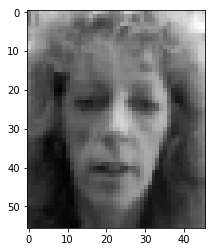

In [4]:
A = np.subtract(X_train,X_bar)
# print(A.shape)
# print(np.transpose(X_train)[0]/255)
mean_img = np.transpose(np.array_split(np.concatenate(X_bar,axis=0)/255, W))
person = np.transpose(np.array_split(np.transpose(X_train)[0]/255, W))
# print(person)
imgplot = plt.imshow(person, cmap='gray')
print(person[20,20])
plt.imsave('images/original_person.png', person, cmap='gray')

(2576, 390)


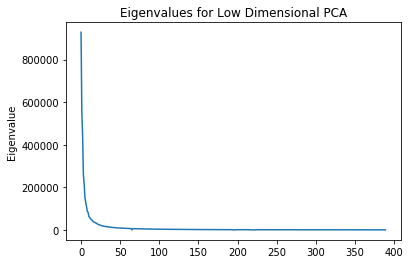

In [5]:
print(A.shape)
S_LDA = (1/N)*np.matmul(np.transpose(A),A)
w_lda, v_lda = np.linalg.eig(S_LDA)
# v_lda = np.transpose(v_lda)
# [v_lda for w_lda,v_lda in sorted(zip(w_lda, v_lda), reverse=True)]
# v_lda = np.transpose(v_lda)
plt.plot(w_lda)
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues for Low Dimensional PCA')
plt.show()

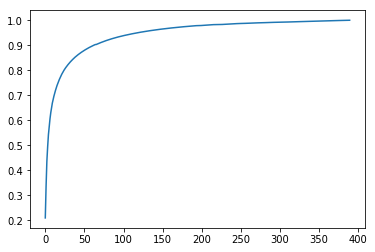

In [6]:
cum_w = np.cumsum(w_lda)/np.sum(w_lda)
plt.plot(cum_w)
plt.show()

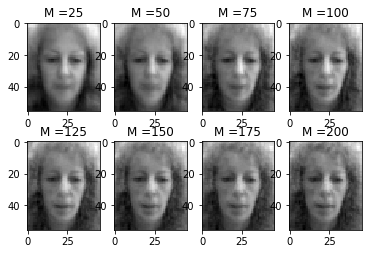

In [7]:
e = []
i = 0
for M in range(25,201,25):
    i += 1
    filename = 'images/reconstructed_person_M_'+str(M)+'.png'
    V = v_lda[:,:M]
    U = preprocessing.normalize(np.matmul(A,V), axis=0)
    a = np.matmul(np.transpose(A),U)
    identity = a[0]
    normalised_recon = np.matmul(identity,np.transpose(U))
    reconstruction = np.atleast_2d(normalised_recon)
    reconstruction = np.add(np.transpose(reconstruction),X_bar)
    reconstructed_person = np.transpose(np.array_split(np.transpose(reconstruction)[0]/255, W))
    diff = (person-reconstructed_person).reshape(-1)
    e.append(np.sum(diff*diff))
    ax = plt.subplot(2, 4, i)
    ax.set_title("M =" + str(M))
    ax.imshow(reconstructed_person, cmap='gray')
#     plt.imsave(filename, reconstructed_person, cmap='gray')


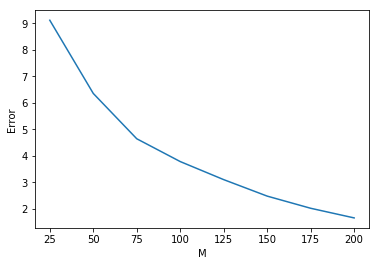

In [8]:
plt.plot(range(25,201,25), e)
plt.xlabel('M')
plt.ylabel('Error')
plt.show()